# Logistic Regression

### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('logistic_reg.csv')
df.head(10)

,x1,x2,label
0,21.476623,14.015911,1.0
1,-26.951466,-13.747162,0.0
2,4.287420,-11.628341,0.0
3,-17.295981,-23.864650,0.0
4,22.682159,20.769558,1.0
5,-4.400252,-1.399145,0.0
6,10.469592,2.609161,0.0
7,27.468712,26.992179,1.0
8,22.039176,5.459492,1.0
9,5.596212,0.753507,0.0


<Axes: xlabel='x1', ylabel='x2'>

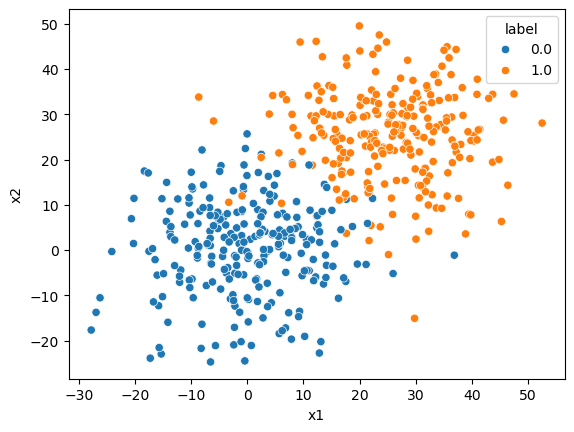

In [3]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
X = df[['x1','x2']].to_numpy()
X[:10]

array([[ 21.47662337,  14.01591057],
       [-26.95146623, -13.74716174],
       [  4.28741975, -11.62834092],
       [-17.29598115, -23.86465033],
       [ 22.68215901,  20.76955807],
       [ -4.40025196,  -1.39914457],
       [ 10.46959233,   2.60916147],
       [ 27.46871175,  26.99217923],
       [ 22.03917627,   5.45949198],
       [  5.59621215,   0.75350749]])

In [6]:
y = df['label'].to_numpy()
y[:10]

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 0.])

In [7]:
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

In [8]:
reg.coef_ # együtthatók

array([[0.24692372, 0.26467808]])

In [9]:
reg.intercept_ #eltolás paramétere

array([-6.38857843])

The result of the linear regression is the coefficients $\theta$ 's of the equation:
<br><br>
<center>$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$</center>

* `coef_` returns a list of $\theta_1, \theta_2, ... , \theta_n$
* `intercept_` returns the value of $\theta_0$

In the previous example, we have $x_1$ and $x_2$, thus two coefficients $\theta_1$ and $\theta_2$

To draw the line separating the 2 datasets, we just have to replace the coefficients and intercept in this equation:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$

$x_2 = -(\theta_0 + \theta_1 x_1) / \theta_2 $


<Axes: xlabel='x1', ylabel='x2'>

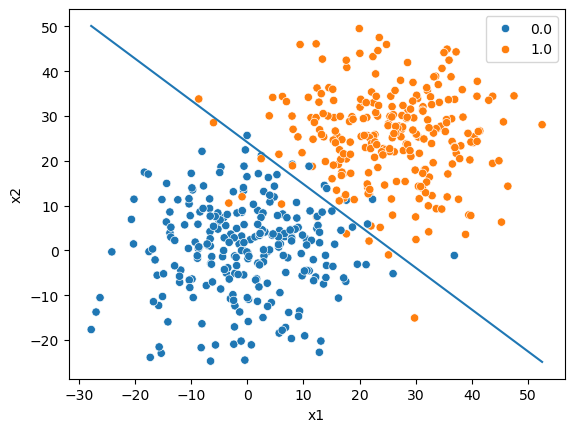

In [11]:
theta0 = reg.intercept_
theta1 = reg.coef_[0,0] # 0. osztály 0. együttható
theta2 = reg.coef_[0,1] # 0. osztály 1. együttható

x2 = -(theta0+theta1*df['x1'])/theta2
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])
sns.lineplot(x=df['x1'],y=x2)

<hr />

### How to predict new values?

if you have a value of $x$, you can either replace the value in previous $h(x)$ equation, and check if the value is less or more than 0, or use `predict` function below:

In [27]:
reg.predict([
                [0,40], # x1 x2
                [0,-10] # x1 x2
            ])
#first belongs to class 1, second to class 0

array([1., 0.])